In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from ast import literal_eval
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter, LogColorMapper
%matplotlib inline

# Data science process - Step1 - Gather data

In [2]:
# Load Lisbon AirBNB Data
df = pd.read_csv('./data sets/Lisbon/listingsL.csv')

# Data science process - Step2 - Assess data

In [3]:
pd.options.display.max_colwidth = 50
# A first look at the data
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20201021220613,2020-10-25,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...","To get to the city center, tram 15 stops in f...",https://a0.muscache.com/pictures/6422ee92-c84e...,14455,https://www.airbnb.com/users/show/14455,...,10.0,10.0,9.0,NaN,t,1,1,0,0,0.35
1,25659,https://www.airbnb.com/rooms/25659,20201021220613,2020-10-24,Heart of Alfama - Coeur d'Alfama - Lisbon Center,*** 100% Covid 19 cleaning protocols <br /><br...,Alfama is the oldest and most picturesque quar...,https://a0.muscache.com/pictures/a4c86b5f-ceaf...,107347,https://www.airbnb.com/users/show/107347,...,10.0,10.0,10.0,56539/AL.,t,1,1,0,0,1.43
2,29248,https://www.airbnb.com/rooms/29248,20201021220613,2020-10-22,Apartamento Alfama com vista para o rio!,<b>The space</b><br />Located in the city cent...,NaN,https://a0.muscache.com/pictures/4212cc65-2046...,125768,https://www.airbnb.com/users/show/125768,...,10.0,10.0,9.0,23535/AL,t,1,1,0,0,2.70
3,29396,https://www.airbnb.com/rooms/29396,20201021220613,2020-10-24,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon....,Great neighborhood in the old part of town. Am...,https://a0.muscache.com/pictures/163913/7d622c...,126415,https://www.airbnb.com/users/show/126415,...,10.0,10.0,9.0,28737/AL,t,2,2,0,0,2.50
4,29915,https://www.airbnb.com/rooms/29915,20201021220613,2020-10-23,Modern and Cool Apartment in Lisboa,A modern and equipped apartment. Quiet and pea...,"Location:<br />Entrecampos, Avenida das Forças...",https://a0.muscache.com/pictures/1225149/8b3e9...,128890,https://www.airbnb.com/users/show/128890,...,10.0,9.0,9.0,85851/AL.,f,1,1,0,0,0.30


In [4]:
# How many rows and columns?
df.shape

(20230, 74)

In [5]:
# What is the data type of each column?
df.info(verbose=True)
# host_response_rate, host_acceptance_rate and price are object type but
# should be numerical type!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20230 entries, 0 to 20229
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20230 non-null  int64  
 1   listing_url                                   20230 non-null  object 
 2   scrape_id                                     20230 non-null  int64  
 3   last_scraped                                  20230 non-null  object 
 4   name                                          20220 non-null  object 
 5   description                                   20212 non-null  object 
 6   neighborhood_overview                         13536 non-null  object 
 7   picture_url                                   20230 non-null  object 
 8   host_id                                       20230 non-null  int64  
 9   host_url                                      20230 non-null 

In [6]:
# Columns with constant values (should not be considered in the analysis)
df.columns[df.nunique() <= 1]

Index(['scrape_id', 'bathrooms', 'calendar_updated', 'has_availability'], dtype='object')

In [7]:
pd.set_option('display.max_rows', None)
# What is the % of NaN in each column?
df.isnull().sum()/len(df)

id                                              0.000000
listing_url                                     0.000000
scrape_id                                       0.000000
last_scraped                                    0.000000
name                                            0.000494
description                                     0.000890
neighborhood_overview                           0.330895
picture_url                                     0.000000
host_id                                         0.000000
host_url                                        0.000000
host_name                                       0.000000
host_since                                      0.000000
host_location                                   0.000741
host_about                                      0.400593
host_response_time                              0.204399
host_response_rate                              0.204399
host_acceptance_rate                            0.118438
host_is_superhost              

In [8]:
# Columns with 100% of NaN values
df.columns[df.isnull().sum()/len(df) == 1]

Index(['bathrooms', 'calendar_updated'], dtype='object')

In [9]:
# Columns with more than 20% of NaN values
df.columns[df.isnull().sum()/len(df) > .20]

Index(['neighborhood_overview', 'host_about', 'host_response_time',
       'host_response_rate', 'host_neighbourhood', 'neighbourhood',
       'bathrooms', 'calendar_updated'],
      dtype='object')

In [10]:
# Descriptive statistics of numerical columns
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.023000e+04,2.023000e+04,2.023000e+04,20230.000000,20230.000000,20230.000000,20230.000000,20230.000000,0.0,19217.000000,...,16657.000000,16652.000000,16656.000000,16654.000000,16655.000000,20230.000000,20230.000000,20230.000000,20230.000000,16821.000000
mean,2.385170e+07,2.020102e+13,1.001566e+08,18.377064,18.377064,38.758797,-9.206329,4.121354,NaN,1.765832,...,9.475896,9.673252,9.685519,9.575718,9.249655,12.497281,10.309343,1.803955,0.162135,1.314723
std,1.298681e+07,3.918066e+00,1.003101e+08,63.534236,63.534236,0.109544,0.112867,2.442305,NaN,1.189354,...,0.871642,0.804959,0.798932,0.735558,0.901739,31.901068,31.609172,6.345447,1.193400,1.402408
min,6.499000e+03,2.020102e+13,1.445500e+04,0.000000,0.000000,38.676450,-9.498520,0.000000,NaN,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.386446e+07,2.020102e+13,1.510152e+07,1.000000,1.000000,38.710910,-9.260265,2.000000,NaN,1.000000,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.290000
50%,2.404823e+07,2.020102e+13,6.251135e+07,4.000000,4.000000,38.717350,-9.146890,4.000000,NaN,1.000000,...,10.000000,10.000000,10.000000,10.000000,9.000000,3.000000,2.000000,0.000000,0.000000,0.870000
75%,3.470782e+07,2.020102e+13,1.704261e+08,11.000000,11.000000,38.739020,-9.134800,5.000000,NaN,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6.000000,1.000000,0.000000,1.950000
max,4.598750e+07,2.020102e+13,3.726313e+08,942.000000,942.000000,39.297670,-8.840090,16.000000,NaN,25.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,251.000000,251.000000,82.000000,18.000000,59.300000


In [11]:
# A look at my apartment
df[df['id'] == 24820380]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10562,24820380,https://www.airbnb.com/rooms/24820380,20201021220613,2020-10-24,Traditional Alfama by Upperground,Refurbished flat located in one of the more tr...,NaN,https://a0.muscache.com/pictures/02e465e5-7e57...,101542522,https://www.airbnb.com/users/show/101542522,...,9.0,10.0,8.0,282/AL,t,10,10,0,0,2.6


# Data science process - Step3 - Clean data

- Convert host_response_rate and host_acceptance_rate to numeric

In [12]:
# Convert host_response_rate and host_acceptance_rate to numeric
df['host_response_rate'] = pd.to_numeric(df.host_response_rate.str[:-1])
df['host_acceptance_rate'] = pd.to_numeric(df.host_acceptance_rate.str[:-1])

In [13]:
pd.set_option('display.max_rows', 10)
df.groupby(['host_response_rate']).agg(['count']).id

,count
host_response_rate,
0.0,495
10.0,1
12.0,1
13.0,1
20.0,8
...,...
96.0,172
97.0,380
98.0,171


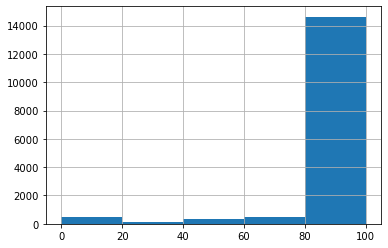

In [14]:
df['host_response_rate'].hist(bins=5)
plt.show()

- Convert price to numeric

In [15]:
# Convert price to numeric
df['price'].replace(',', '', regex=True, inplace=True)
df['price'] = pd.to_numeric(df.price.str[1:])

In [16]:
df.groupby(['price']).agg(['count']).id.sort_values(by='price')

,count
price,
0.0,2
9.0,13
10.0,30
11.0,24
12.0,60
...,...
5729.0,1
8000.0,3
8125.0,1


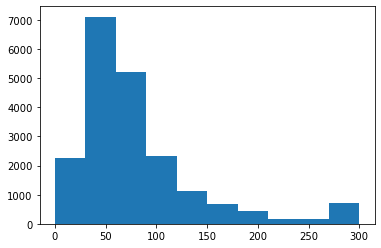

In [17]:
plt.hist(np.clip(df['price'], 0, 300))
plt.show()

- Clean amenities field and create one FLAG for each amenity

In [18]:
# How many different values in column "amenities"
df['amenities'].nunique()

18995

In [19]:
# The problem is that all amenities of a listing are stored in only one field
pd.options.display.max_colwidth = None
df[df['id'] == 24820380].amenities

10562    ["Essentials", "Dishes and silverware", "Iron", "Heating", "Shampoo", "Oven", "First aid kit", "Kitchen", "Fire extinguisher", "TV", "Hair dryer", "Stove", "Cooking basics", "Wifi", "Refrigerator", "Microwave", "Laptop-friendly workspace", "Hot water"]
Name: amenities, dtype: object

In [20]:
pd.options.display.max_colwidth = 50

In [21]:
# Clean amenities field
df['amenities'] = df['amenities'].apply(literal_eval)
df['amenities'] = df['amenities'].apply(lambda amenity: str(amenity))

In [22]:
# Create a set of distinct values in "amenities" field
# 1. Remove "[" and "]" at the beginning and at the end of the string
df['amenities2'] = df['amenities'].apply(lambda st:
                                         st[st.find('[')+1:st.find(']')])
# 2. For each amnenity listed in amenities field of each row create a different
#    column with the amenity string
df_amenities = df['amenities2'].str.split(', ', expand=True)
# 3. Create an empty set of amenities
amenities_set = {}
# 4. Add each amenity to the amenities set
for n in range(0, df_amenities.shape[1]-1):
    amenities_set = set(df_amenities[n].replace({'\'':''},
                        regex=True)).union(amenities_set)

In [23]:
df_amenities.shape[1]

66

In [24]:
pd.set_option('display.max_rows', 10)
df_amenities

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,'Fire extinguisher','Hair dryer','Refrigerator','Long term stays allowed','Dishwasher','Shampoo','Oven','First aid kit','Kitchen','Stove',...,None,None,None,None,None,None,None,None,None,None
1,'Paid parking off premises','Fire extinguisher','Hair dryer','Laptop-friendly workspace','Refrigerator','Heating','Shampoo','Kitchen','Stove','Washer',...,None,None,None,None,None,None,None,None,None,None
2,'Heating','Paid parking off premises','Kitchen','Hot water','Microwave','Luggage dropoff allowed','Long term stays allowed','Host greets you','Hangers','Wifi',...,None,None,None,None,None,None,None,None,None,None
3,'Paid parking off premises','Fire extinguisher','Hair dryer','Single level home','Laptop-friendly workspace','Refrigerator','Long term stays allowed','Heating','First aid kit','Kitchen',...,None,None,None,None,None,None,None,None,None,None
4,'Heating','Oven','Garden or backyard','Kitchen','Hot water','Microwave','TV','Air conditioning','Wifi','Elevator',...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20225,'Washer','Garden or backyard','Kitchen','TV','Lockbox','Smoke alarm','Wifi','Hair dryer','First aid kit','Dryer',...,None,None,None,None,None,None,None,None,None,None
20226,'Essentials','Heating','Air conditioning','First aid kit','Breakfast','Kitchen','Hair dryer','Lock on bedroom door','Wifi','Hangers',...,None,None,None,None,None,None,None,None,None,None
20227,'Washer','Bed linens','Kitchen','Microwave','Refrigerator','Wifi','Air conditioning','Cooking basics','Stove','Hair dryer',...,None,None,None,None,None,None,None,None,None,None
20228,'Hangers','Air conditioning','Shampoo','Smoke alarm','Elevator','Fire extinguisher','Laptop-friendly workspace','Cable TV','Bed linens','Carbon monoxide alarm',...,None,None,None,None,None,None,None,None,None,None


In [25]:
# Number of different amenities listed in "amenities" field
len(amenities_set)

316

In [26]:
# The set of distinct amenities
amenities_set

{'',
 ' linens',
 ' toiletries',
 '32" HDTV',
 '32" HDTV with premium cable',
 '32" HDTV with standard cable',
 '32" TV',
 '36" HDTV',
 '4 Ring Gas cooker gas stove',
 '40" HDTV with premium cable',
 '40" HDTV with standard cable',
 '40" TV with standard cable',
 '43" HDTV',
 '43" HDTV with Netflix',
 '45" TV with standard cable',
 '48" HDTV with premium cable',
 '50" HDTV with Netflix',
 '55" HDTV with Netflix',
 '55" HDTV with standard cable',
 '65" HDTV with standard cable',
 'AEG stainless steel gas stove',
 'AEG stainless steel oven',
 'Air conditioning',
 'Airport shuttle',
 'Amazon Echo  sound system with Bluetooth and aux',
 'Amazon Prime Video',
 'Ariston gas stove',
 'Ariston refrigerator',
 'Ariston stainless steel oven',
 'Aroma de Portugal shampoo',
 'Aromas de Portugal body soap',
 'Aromas de Portugal conditioner',
 'Aromas de Portugal shampoo',
 'BBQ grill',
 'BEKO refrigerator',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Balay elect

In [27]:
# Remove the string '' and None
amenities_set.remove('')
amenities_set.remove(None)
# Number of different amenities listed in "amenities" field
len(amenities_set)

314

In [28]:
# For each amenity in the amenities set creates a new column flag in original
# dataframe
for am in amenities_set:
    if am is not None:
        new_col = 'flag_amenity_' + am
        df[new_col] = df['amenities'].str.contains(am)

In [29]:
# How many columns now? 74+1+314=389
df.shape

(20230, 389)

In [30]:
pd.options.display.max_colwidth = 50
pd.set_option('display.max_columns', None)

In [31]:
df[df['id'] == 24820380]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities2,flag_amenity_Sound system,flag_amenity_Window AC unit,flag_amenity_Coffee maker,flag_amenity_Paid parking off premises,flag_amenity_Pool toys,flag_amenity_4 Ring Gas cooker gas stove,flag_amenity_Lanai,flag_amenity_Portuguese Convection Oven stainless steel oven,flag_amenity_Terrace,flag_amenity_Sound system with Bluetooth and aux,flag_amenity_Wifi – 80 Mbps,flag_amenity_Ethernet connection,flag_amenity_Paid parking lot on premises,flag_amenity_Toshiba sound system with aux,flag_amenity_Oven,flag_amenity_Fire extinguisher,"flag_amenity_55"" HDTV with standard cable",flag_amenity_Amazon Echo sound system with Bluetooth and aux,flag_amenity_Air conditioning,flag_amenity_Piano,flag_amenity_Rituals conditioner,flag_amenity_Baking sheet,flag_amenity_BBQ grill,flag_amenity_Concierge,flag_amenity_Bosch stainless steel induction stove,flag_amenity_Aromas de Portugal shampoo,flag_amenity_Stove,flag_amenity_Sun loungers,flag_amenity_Paid parking lot on premises – 13 spaces,flag_amenity_Free parking garage on premises – 1 space,flag_amenity_Driveway parking,flag_amenity_First aid kit,"flag_amenity_32"" HDTV with premium cable",flag_amenity_Keypad,flag_amenity_Outlet covers,flag_amenity_Delphius shampoo,flag_amenity_Marshall sound system with Bluetooth and aux,flag_amenity_Indesit refrigerator,flag_amenity_Mini fridge,flag_amenity_Smart TV,flag_amenity_Stainless steel gas stove,flag_amenity_Outdoor pool,flag_amenity_Baby bath,flag_amenity_JBL Bluetooth sound system,flag_amenity_Portable air conditioning,flag_amenity_Pocket wifi,flag_amenity_High chair,flag_amenity_Stainless steel electric stove,flag_amenity_LG sound system with aux,flag_amenity_Patio or balcony,flag_amenity_unterschiedlich body soap,flag_amenity_Hot tub,flag_amenity_Garden,flag_amenity_Siemens stainless steel oven,flag_amenity_Laptop-friendly workspace,flag_amenity_Luggage dropoff allowed,flag_amenity_Bed sheets and pillows,flag_amenity_Washer –\xa0In unit,flag_amenity_Wifi – 4 Mbps,flag_amenity_Free parking on premises – 2 spaces,"flag_amenity_32"" TV",flag_amenity_Toiletries,flag_amenity_Long term stays allowed,flag_amenity_Feno de Portugal body soap,flag_amenity_Breakfast bar,flag_amenity_Samsung refrigerator,flag_amenity_Minibar,flag_amenity_Safe,"flag_amenity_40"" HDTV with standard cable",flag_amenity_Kunft electric stove,flag_amenity_Kunft refrigerator,flag_amenity_Onsite restaurant — Oceano Restaurant,flag_amenity_HBO Max,flag_amenity_Wifi – 300 Mbps,flag_amenity_Window guards,flag_amenity_FRICON refrigerator,flag_amenity_Free driveway parking on premises – 1 space,flag_amenity_Wifi – 100 Mbps,"flag_amenity_36"" HDTV",flag_amenity_HDTV,flag_amenity_Onsite bar —

In [32]:
df['flag_amenity_Wifi'].sum()

19526

In [33]:
df['flag_amenity_Safe'].sum()

3

In [34]:
filter_col = [col for col in df if col.startswith('flag_amenity_')]
filter_col

['flag_amenity_Sound system',
 'flag_amenity_Window AC unit',
 'flag_amenity_Coffee maker',
 'flag_amenity_Paid parking off premises',
 'flag_amenity_Pool toys',
 'flag_amenity_4 Ring Gas cooker gas stove',
 'flag_amenity_Lanai',
 'flag_amenity_Portuguese Convection Oven stainless steel oven',
 'flag_amenity_Terrace',
 'flag_amenity_Sound system with Bluetooth and aux',
 'flag_amenity_Wifi – 80 Mbps',
 'flag_amenity_Ethernet connection',
 'flag_amenity_Paid parking lot on premises',
 'flag_amenity_Toshiba sound system with aux',
 'flag_amenity_Oven',
 'flag_amenity_Fire extinguisher',
 'flag_amenity_55" HDTV with standard cable',
 'flag_amenity_Amazon Echo  sound system with Bluetooth and aux',
 'flag_amenity_Air conditioning',
 'flag_amenity_Piano',
 'flag_amenity_Rituals conditioner',
 'flag_amenity_Baking sheet',
 'flag_amenity_BBQ grill',
 'flag_amenity_Concierge',
 'flag_amenity_Bosch stainless steel induction stove',
 'flag_amenity_Aromas de Portugal shampoo',
 'flag_amenity_Stov

In [35]:
perc_amenity = df[filter_col].sum()/len(df)

In [36]:
perc_amenity.sort_values(ascending=False)

flag_amenity_Wifi                          0.965200
flag_amenity_Essentials                    0.934503
flag_amenity_Kitchen                       0.904152
flag_amenity_Hair dryer                    0.838309
flag_amenity_TV                            0.829263
                                             ...   
flag_amenity_Satellite TV                  0.000049
flag_amenity_45" TV with standard cable    0.000049
flag_amenity_Washer –\xa0In unit           0.000000
flag_amenity_Dryer –\xa0In unit            0.000000
flag_amenity_Washer –\xa0In building       0.000000
Length: 314, dtype: float64

In [37]:
df['tot_amenities'] = df[filter_col].sum(axis=1)

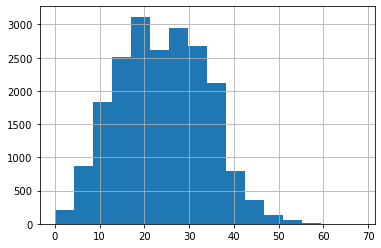

In [38]:
df['tot_amenities'].hist(bins=16)
plt.show()

In [39]:
df[df['id'] == 24820380]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities2,flag_amenity_Sound system,flag_amenity_Window AC unit,flag_amenity_Coffee maker,flag_amenity_Paid parking off premises,flag_amenity_Pool toys,flag_amenity_4 Ring Gas cooker gas stove,flag_amenity_Lanai,flag_amenity_Portuguese Convection Oven stainless steel oven,flag_amenity_Terrace,flag_amenity_Sound system with Bluetooth and aux,flag_amenity_Wifi – 80 Mbps,flag_amenity_Ethernet connection,flag_amenity_Paid parking lot on premises,flag_amenity_Toshiba sound system with aux,flag_amenity_Oven,flag_amenity_Fire extinguisher,"flag_amenity_55"" HDTV with standard cable",flag_amenity_Amazon Echo sound system with Bluetooth and aux,flag_amenity_Air conditioning,flag_amenity_Piano,flag_amenity_Rituals conditioner,flag_amenity_Baking sheet,flag_amenity_BBQ grill,flag_amenity_Concierge,flag_amenity_Bosch stainless steel induction stove,flag_amenity_Aromas de Portugal shampoo,flag_amenity_Stove,flag_amenity_Sun loungers,flag_amenity_Paid parking lot on premises – 13 spaces,flag_amenity_Free parking garage on premises – 1 space,flag_amenity_Driveway parking,flag_amenity_First aid kit,"flag_amenity_32"" HDTV with premium cable",flag_amenity_Keypad,flag_amenity_Outlet covers,flag_amenity_Delphius shampoo,flag_amenity_Marshall sound system with Bluetooth and aux,flag_amenity_Indesit refrigerator,flag_amenity_Mini fridge,flag_amenity_Smart TV,flag_amenity_Stainless steel gas stove,flag_amenity_Outdoor pool,flag_amenity_Baby bath,flag_amenity_JBL Bluetooth sound system,flag_amenity_Portable air conditioning,flag_amenity_Pocket wifi,flag_amenity_High chair,flag_amenity_Stainless steel electric stove,flag_amenity_LG sound system with aux,flag_amenity_Patio or balcony,flag_amenity_unterschiedlich body soap,flag_amenity_Hot tub,flag_amenity_Garden,flag_amenity_Siemens stainless steel oven,flag_amenity_Laptop-friendly workspace,flag_amenity_Luggage dropoff allowed,flag_amenity_Bed sheets and pillows,flag_amenity_Washer –\xa0In unit,flag_amenity_Wifi – 4 Mbps,flag_amenity_Free parking on premises – 2 spaces,"flag_amenity_32"" TV",flag_amenity_Toiletries,flag_amenity_Long term stays allowed,flag_amenity_Feno de Portugal body soap,flag_amenity_Breakfast bar,flag_amenity_Samsung refrigerator,flag_amenity_Minibar,flag_amenity_Safe,"flag_amenity_40"" HDTV with standard cable",flag_amenity_Kunft electric stove,flag_amenity_Kunft refrigerator,flag_amenity_Onsite restaurant — Oceano Restaurant,flag_amenity_HBO Max,flag_amenity_Wifi – 300 Mbps,flag_amenity_Window guards,flag_amenity_FRICON refrigerator,flag_amenity_Free driveway parking on premises – 1 space,flag_amenity_Wifi – 100 Mbps,"flag_amenity_36"" HDTV",flag_amenity_HDTV,flag_amenity_Onsite bar —

# Data science process - Steps4&6 - Analyze and visualize data

### Question 1. How does my apartment compares to direct competition?

- Preliminary data preparation and analysis to answer the question

In [40]:
# Create a flag to identify my apartment
df['flag_my_apartment'] = df['id'] == 24820380

In [41]:
# Look at all features for my apartment
df[df['flag_my_apartment'] == True]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities2,flag_amenity_Sound system,flag_amenity_Window AC unit,flag_amenity_Coffee maker,flag_amenity_Paid parking off premises,flag_amenity_Pool toys,flag_amenity_4 Ring Gas cooker gas stove,flag_amenity_Lanai,flag_amenity_Portuguese Convection Oven stainless steel oven,flag_amenity_Terrace,flag_amenity_Sound system with Bluetooth and aux,flag_amenity_Wifi – 80 Mbps,flag_amenity_Ethernet connection,flag_amenity_Paid parking lot on premises,flag_amenity_Toshiba sound system with aux,flag_amenity_Oven,flag_amenity_Fire extinguisher,"flag_amenity_55"" HDTV with standard cable",flag_amenity_Amazon Echo sound system with Bluetooth and aux,flag_amenity_Air conditioning,flag_amenity_Piano,flag_amenity_Rituals conditioner,flag_amenity_Baking sheet,flag_amenity_BBQ grill,flag_amenity_Concierge,flag_amenity_Bosch stainless steel induction stove,flag_amenity_Aromas de Portugal shampoo,flag_amenity_Stove,flag_amenity_Sun loungers,flag_amenity_Paid parking lot on premises – 13 spaces,flag_amenity_Free parking garage on premises – 1 space,flag_amenity_Driveway parking,flag_amenity_First aid kit,"flag_amenity_32"" HDTV with premium cable",flag_amenity_Keypad,flag_amenity_Outlet covers,flag_amenity_Delphius shampoo,flag_amenity_Marshall sound system with Bluetooth and aux,flag_amenity_Indesit refrigerator,flag_amenity_Mini fridge,flag_amenity_Smart TV,flag_amenity_Stainless steel gas stove,flag_amenity_Outdoor pool,flag_amenity_Baby bath,flag_amenity_JBL Bluetooth sound system,flag_amenity_Portable air conditioning,flag_amenity_Pocket wifi,flag_amenity_High chair,flag_amenity_Stainless steel electric stove,flag_amenity_LG sound system with aux,flag_amenity_Patio or balcony,flag_amenity_unterschiedlich body soap,flag_amenity_Hot tub,flag_amenity_Garden,flag_amenity_Siemens stainless steel oven,flag_amenity_Laptop-friendly workspace,flag_amenity_Luggage dropoff allowed,flag_amenity_Bed sheets and pillows,flag_amenity_Washer –\xa0In unit,flag_amenity_Wifi – 4 Mbps,flag_amenity_Free parking on premises – 2 spaces,"flag_amenity_32"" TV",flag_amenity_Toiletries,flag_amenity_Long term stays allowed,flag_amenity_Feno de Portugal body soap,flag_amenity_Breakfast bar,flag_amenity_Samsung refrigerator,flag_amenity_Minibar,flag_amenity_Safe,"flag_amenity_40"" HDTV with standard cable",flag_amenity_Kunft electric stove,flag_amenity_Kunft refrigerator,flag_amenity_Onsite restaurant — Oceano Restaurant,flag_amenity_HBO Max,flag_amenity_Wifi – 300 Mbps,flag_amenity_Window guards,flag_amenity_FRICON refrigerator,flag_amenity_Free driveway parking on premises – 1 space,flag_amenity_Wifi – 100 Mbps,"flag_amenity_36"" HDTV",flag_amenity_HDTV,flag_amenity_Onsite bar —

In [42]:
df[df['neighbourhood_group_cleansed'] ==
   'Lisboa'].neighbourhood_cleansed.nunique()

24

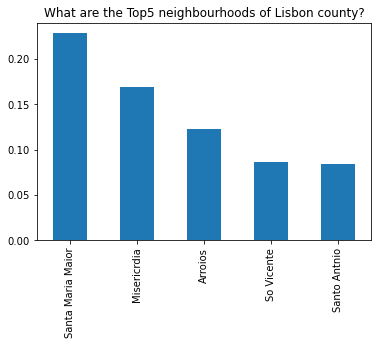

In [43]:
# Top5 neighbourhoods of Lisbon county
plt.title("What are the Top5 neighbourhoods of Lisbon county?")
(df[df['neighbourhood_group_cleansed'] == 'Lisboa']['neighbourhood_cleansed'].
    value_counts()[:5] / df[df['neighbourhood_group_cleansed'] == 'Lisboa'].
    shape[0]).plot(kind="bar")
plt.show()

In [44]:
# Conclusion: Top5 neighbourhoods have about 70% of the listings of Lisbon
# county, and the neighbourhood of my apartment (Santa Maria Maior) has
# almost 1/4 of them

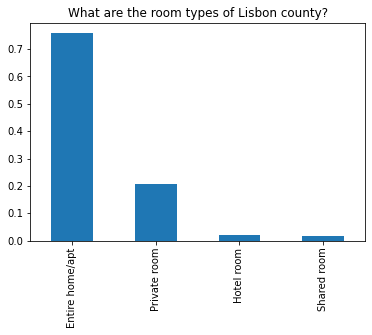

In [45]:
plt.title("What are the room types of Lisbon county?");
(df[df['neighbourhood_group_cleansed'] == 'Lisboa']['room_type'].value_counts()/
     df[df['neighbourhood_group_cleansed'] == 'Lisboa'].shape[0]).plot(kind="bar");

In [46]:
# Conclusion: More than 70% of the listings in Lisbon county have the
# type "Entire home/apt"

In [47]:
# Create a subset only with entire home/apt in neighbourhood_group = 'Lisboa'
# This is the subset of apartments that makes sense to compare with mine,
# because they are potentially the most suitable for the same target population
df_lisbon_entire = df[(df['neighbourhood_group_cleansed'] == 'Lisboa') &
                      (df['room_type'] == 'Entire home/apt')]
df_lisbon_entire.shape

(10903, 391)

In [48]:
# Descriptive statistics of numerical columns in the new dataset
df_lisbon_entire.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,tot_amenities
count,1.090300e+04,1.090300e+04,1.090300e+04,8829.000000,9987.000000,10903.00000,10903.00000,10903.000000,10903.000000,10903.000000,0.0,10208.000000,10888.000000,10903.000000,10903.000000,1.090300e+04,10903.000000,10903.000000,1.090300e+04,1.090300e+04,10903.000000,1.090300e+04,0.0,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,9636.000000,9620.000000,9620.000000,9619.000000,9621.000000,9620.000000,9620.000000,10903.000000,10903.000000,10903.000000,10903.000000,9684.000000,10903.000000
mean,2.279513e+07,2.020102e+13,8.998511e+07,93.924793,95.149695,24.05659,24.05659,38.718464,-9.142772,4.410071,NaN,1.821708,2.608744,91.752895,3.432633,4.822879e+05,3.341190,4.562506,4.821188e+05,4.821921e+05,3.806237,4.821481e+05,NaN,15.908924,35.158213,55.522517,243.818215,61.529579,8.139503,0.373200,93.141449,9.636279,9.512474,9.672627,9.700759,9.653015,9.252599,16.033018,15.576905,0.417225,0.012565,1.639806,24.646611
std,1.296900e+07,2.996231e+00,9.702186e+07,18.248424,15.431951,76.70996,76.70996,0.013823,0.017728,2.183467,NaN,1.114645,1.978326,207.487359,14.584373,2.970403e+07,14.478182,16.756107,2.970402e+07,2.970402e+07,15.136070,2.970402e+07,NaN,12.986744,25.452576,36.121663,123.449920,78.663223,10.828786,1.029934,7.432172,0.715354,0.779954,0.732749,0.719746,0.619515,0.805957,38.921769,38.882120,2.558991,0.263905,1.486110,9.040145
min,6.499000e+03,2.020102e+13,1.445500e+04,0.000000,0.000000,0.00000,0.00000,38.692560,-9.226640,1.000000,NaN,1.000000,0.000000,10.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000
25%,1.300437e+07,2.020102e+13,1.007560e+07,98.000000,99.000000,1.00000,1.00000,38.710810,-9.149855,3.000000,NaN,1.000000,1.000000,48.000000,2.000000,1.800000e+02,2.000000,2.000000,3.650000e+02,7.300000e+02,2.000000,3.650000e+02,NaN,0.000000,0.000000,19.000000,150.000000,5.000000,0.000000,0.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.500000,18.000000
50%,2.302211e+07,2.020102e+13,4.693613e+07,100.000000,100.000000,4.00000,4.00000,38.714230,-9.140860,4.000000,NaN,2.000000,2.000000,65.000000,2.000000,1.125000e+03,2.000000,3.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,NaN,21.000000,49.000000,73.000000,294.000000,30.000000,4.000000,0.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,4.000000,3.000000,0.000000,0.000000,1.310000,25.000000
75%,3.313536e+07,2.020102e+13,1.493199e+08,100.000000,100.000000,14.00000,14.00000,38.720920,-9.132045,6.000000,NaN,2.000000,3.000000,94.000000,3.000000,1.125000e+03,3.000000,3.000000,1.125000e+03,1.125000e+03,3.000000,1.125000e+03,NaN,29.000000,59.000000,89.000000,357.000000,89.000000,12.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,10.000000,0.000000,0.000000,2.450000,31.000000
max,4.598554e+07,2.020102e+13,3.726238e+08,100.000000,100.000000,536.00000,536.000

- Final visualization to answer the question

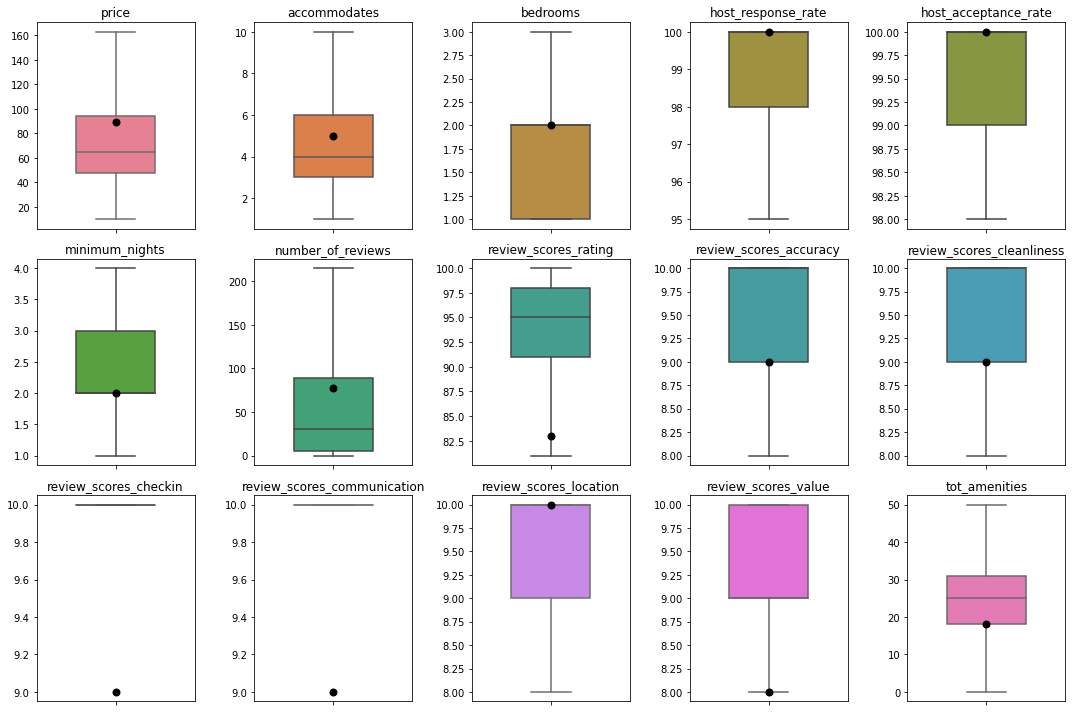

In [49]:
# Compare the distribution of most relevant features with the value of those
# features for my apartment
# Some of these features (such as "bedrooms") have missing values but in this
# case it is not necessary to handle them, # because they do not interfere with
# box plot graphics
variables = ('price', 'accommodates', 'bedrooms', 'host_response_rate',
             'host_acceptance_rate', 'minimum_nights', 'number_of_reviews',
             'review_scores_rating', 'review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location',
             'review_scores_value', 'tot_amenities')
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
i = j = k = 0
for variable in variables:
    mycolor = sns.color_palette("husl", 15)[k]
    k += 1
    g = sns.boxplot(x="flag_my_apartment", y=variable, data=df_lisbon_entire,
                    showfliers=False, color=mycolor,
                    ax=axs[i][j], width=0.5).set(ylabel=None, title=variable)
    g = sns.swarmplot(x="flag_my_apartment", y=variable,
                      data=df_lisbon_entire[df_lisbon_entire[
                          'flag_my_apartment'] == True],
                      color="black", size=8, ax=axs[i][j]).set(xlabel=None,
                                                               xticklabels=[],
                                                               ylabel=None)
    fig.tight_layout()
    j += 1
    if j > 4:
        i += 1
        j = 0

In [50]:
# Main conclusions:
# 1. My apartment accomodates more guests and has more bedrooms than the median
#    value for these features
# 2. Those are probably the main reasons why the price is also higher than the
#    median price, very close to 75% percentile (this relation between the
#    number of guests and the price will be analyzed later)
# 3. Review score for my apartment is very low, almost an outlier
# 4. Checkin, communication and value are Achilles' heels of my apartment and
#    location is its strong point

### Question 2. Is the price related to the number of guests that can stay in an apartment?

- Preliminary data analysis to answer the question

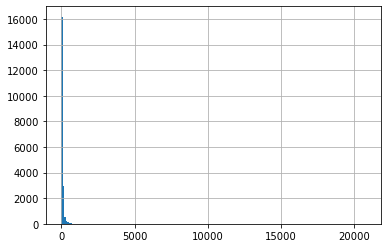

In [51]:
# Neither the "price" feature nor the "accommodates" feature has NaN values
# This is the distribution for "price" variable, that is highly right-skewed
df['price'].hist(bins=200)
plt.show()

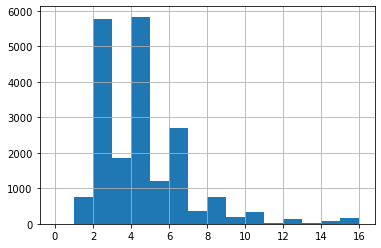

In [52]:
# This is the distribution for "accommodates" variable, that is slightly
# right-skewed
df['accommodates'].hist(bins=16)
plt.show()

In [53]:
# Analyze correlation between the variables - as both features have a
# non-Gaussian distribution, Spearmans correlation should be used

var1 = df['accommodates']
var2 = df['price']
corr, _ = spearmanr(var1, var2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.544


- Final visualization to answer the question

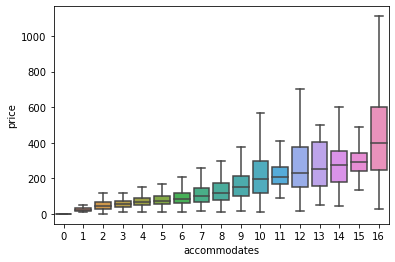

In [54]:
# For each "accommodates" distinct value, analyzes the distribution of "price"
# feature removing outliers
ax = sns.boxplot(x="accommodates", y="price",
                 showfliers=False, data=df)

In [55]:
# Main conclusion: although for each number of guests there is a wide range of
# prices, there is clearly a relationship between the two values, with the
# median of the price always increasing with the number of accommodated
# guests

### Question 3. How does the total price and the price per person vary with the location on the map?

- Preliminary data preparation to answer the question

In [56]:
# Calculate price/person that the appartment accommodates
df['price_per_person'] = df['price']/df['accommodates']

In [57]:
# Aggregate by neighbourhood groups, using the mean latitude and longitude
# (as the coordinates are very close to each other, I will treat the Earth
# as being locally flat and simply find the centroid taking the average of
# the latitudes and the average of the longitudes.)
df_neighbourhood_grp_coord = df.groupby([
    'neighbourhood_group_cleansed']).agg({'latitude': ['count', 'mean'],
                                          'longitude': ['mean'],
                                          'price': ['median'],
                                          'price_per_person': ['median']})
df_neighbourhood_grp_coord.columns = ['qt', 'latitude', 'longitude', 'price',
                                      'price_per_person']

In [58]:
df_neighbourhood_grp_coord.shape

(16, 5)

In [59]:
df_neighbourhood_grp_coord

,qt,latitude,longitude,price,price_per_person
neighbourhood_group_cleansed,,,,,
Alenquer,67,39.086282,-9.046325,60.0,20.833333
Amadora,121,38.753558,-9.223091,40.0,11.500000
Arruda Dos Vinhos,6,38.982478,-9.089392,82.5,23.250000
Azambuja,13,39.159212,-8.880142,70.0,17.500000
Cadaval,60,39.226073,-9.077373,75.0,18.416667
...,...,...,...,...,...
Oeiras,299,38.701788,-9.277390,60.0,17.250000
Sintra,1269,38.808432,-9.402050,71.0,19.500000
Sobral De Monte Agrao,23,39.009031,-9.159475,65.0,20.000000


In [60]:
# Delete neighbourhood groups with less than 50 listings
df_neighbourhood_grp_coord = df_neighbourhood_grp_coord.loc[
    df_neighbourhood_grp_coord['qt'] >= 50].copy()

In [61]:
df_neighbourhood_grp_coord

,qt,latitude,longitude,price,price_per_person
neighbourhood_group_cleansed,,,,,
Alenquer,67,39.086282,-9.046325,60.0,20.833333
Amadora,121,38.753558,-9.223091,40.0,11.500000
Cadaval,60,39.226073,-9.077373,75.0,18.416667
Cascais,1893,38.704830,-9.404385,76.0,20.250000
Lisboa,14397,38.720274,-9.143168,59.0,17.500000
...,...,...,...,...,...
Mafra,1197,38.970340,-9.401434,75.0,18.500000
Odivelas,79,38.792601,-9.184162,49.0,13.750000
Oeiras,299,38.701788,-9.277390,60.0,17.250000


In [62]:
# Define function to switch from lat/long to mercator coordinates
def x_coord(x, y):

    lat = x
    lon = y

    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 +
                                    lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)
# Define coord as tuple (lat,long)
df_neighbourhood_grp_coord['coordinates'] = list(zip(
    df_neighbourhood_grp_coord['latitude'],
    df_neighbourhood_grp_coord['longitude']))
# Obtain list of mercator coordinates
mercators = [x_coord(x, y)
             for x, y in df_neighbourhood_grp_coord['coordinates']]

In [63]:
# Create mercator column in our df_neighbourhood_grp_coord
df_neighbourhood_grp_coord['mercator'] = mercators
# Split that column out into two separate columns - mercator_x and mercator_y
df_neighbourhood_grp_coord[['mercator_x',
                            'mercator_y']] = df_neighbourhood_grp_coord[
    'mercator'].apply(pd.Series)

In [64]:
# Examine our modified DataFrame
df_neighbourhood_grp_coord.head()

,qt,latitude,longitude,price,price_per_person,coordinates,mercator,mercator_x,mercator_y
neighbourhood_group_cleansed,,,,,,,,,
Alenquer,67,39.086282,-9.046325,60.0,20.833333,"(39.08628208955224, -9.046324776119402)","(-1007032.2676281864, 4734038.288138599)",-1.007032e+06,4.734038e+06
Amadora,121,38.753558,-9.223091,40.0,11.500000,"(38.75355801652892, -9.223090661157027)","(-1026709.7559401972, 4686432.099522569)",-1.026710e+06,4.686432e+06
Cadaval,60,39.226073,-9.077373,75.0,18.416667,"(39.22607266666667, -9.077373)","(-1010488.5401006101, 4754106.471752162)",-1.010489e+06,4.754106e+06
Cascais,1893,38.704830,-9.404385,76.0,20.250000,"(38.70482982039092, -9.40438512942419)","(-1046891.363831335, 4679478.7386471145)",-1.046891e+06,4.679479e+06
Lisboa,14397,38.720274,-9.143168,59.0,17.500000,"(38.720273576243834, -9.143168250506847)","(-1017812.8338836482, 4681682.000920578)",-1.017813e+06,4.681682e+06


- Final visualization to answer one of the questions

In [65]:
# Select tile set to use
chosentile = get_provider(Vendors.STAMEN_TONER)

In [66]:
# Select colors
pal = ('#deebf7', '#c6dbef', '#9ecae1', '#6baed6',
       '#4292c6', '#2171b5', '#084594')

In [67]:
# Tell Bokeh to use df_neighbourhood_grp_coord as the source of the data
source = ColumnDataSource(data=df_neighbourhood_grp_coord)

In [68]:
# Define color mapper - which column will define the colour of the data points
color_mapper = linear_cmap(field_name='price', palette=pal,
                           low=df_neighbourhood_grp_coord['price'].min(),
                           high=df_neighbourhood_grp_coord['price'].max())

In [69]:
# Set tooltips - these appear when we hover over a data point in our map,
# very nifty and very useful
tooltips = [("Price","@price"), ("Region","@neighbourhood_group_cleansed")]

In [70]:
# Create figure
p = figure(title='Listings Prices by Neighbourhood in Lisbon',
           x_axis_type="mercator", y_axis_type="mercator",
           x_axis_label='Longitude', y_axis_label='Latitude',
           tooltips=tooltips)

In [71]:
# Add map tile
p.add_tile(chosentile)

TileRenderer(id='1047', ...)

In [72]:
# Add points using mercator coordinates
p.circle(x='mercator_x', y='mercator_y', color=color_mapper,
         source=source, size=30, fill_alpha=0.7)

GlyphRenderer(id='1054', ...)

In [73]:
#Defines color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                     formatter=NumeralTickFormatter(format='0.0[0000]'), 
                     label_standoff=13, width=8, location=(0,0))
# Set color_bar location
p.add_layout(color_bar, 'right')

In [74]:
# Display in notebook
output_notebook()
# Save as HTML
output_file('listings_Lisbon.html',
            title='Listings Prices by Neighbourhood in Lisbon')

Loading BokehJS ...

In [75]:
# Show map
show(p)

In [76]:
# Main conclusion: apartments in the neighboring counties of Lisbon have the
# lowest prices. The apartments in Lisbon have prices in the middle of the
# table and the most expensive apartments are in the municipalities furthest
# from Lisbon, typically close to the sea.
# But are these differences due to the fact that apartments far from Lisbon
# accommodate more people?
# The next analysis provides the answer to this question.

- Final visualization to answer the other question

In [77]:
# Select colors
pal_ppp = ('#fee5d9', '#fcbba1', '#fc9272', '#fb6a4a',
       '#ef3b2c', '#cb181d', '#99000d')

In [78]:
# Define color mapper - which column will define the colour of the data points
color_mapper_ppp = linear_cmap(field_name='price_per_person', palette=pal_ppp,
                               low=df_neighbourhood_grp_coord[
                                   'price_per_person'].min(),
                               high=df_neighbourhood_grp_coord[
                                   'price_per_person'].max())

In [79]:
# Set tooltips - these appear when we hover over a data point in our map,
# very nifty and very useful
tooltips_ppp = [("Price per Person","@price_per_person"),
                ("Region","@neighbourhood_group_cleansed")]

In [80]:
# Create figure
ppp = figure(
    title='Listings Prices per Person by Neighbourhood in Lisbon District',
    x_axis_type="mercator", y_axis_type="mercator",
    x_axis_label='Longitude', y_axis_label='Latitude',
    tooltips=tooltips_ppp)

In [81]:
# Add map tile
ppp.add_tile(chosentile)

TileRenderer(id='1269', ...)

In [82]:
# Add points using mercator coordinates
ppp.circle(x='mercator_x', y='mercator_y', color=color_mapper_ppp,
           source=source, size=30, fill_alpha=0.7)

GlyphRenderer(id='1276', ...)

In [83]:
#Defines color bar
color_bar_ppp = ColorBar(color_mapper=color_mapper_ppp['transform'], 
                         formatter=NumeralTickFormatter(format='0.0[0000]'), 
                         label_standoff=13, width=8, location=(0,0))
# Set color_bar location
ppp.add_layout(color_bar_ppp, 'right')

In [84]:
# Display in notebook
output_notebook()
# Save as HTML
output_file('listings_Lisbon_ppp.html',
            title='Listings Prices per Person by Neighbourhood in Lisbon')

Loading BokehJS ...

In [85]:
# Show map
show(ppp)

In [86]:
# As we can see on the map above, some municipalities with apartments more
# expensive than in Lisbon have lower prices per person than in Lisbon.

# Data science process - Steps5&6 - Model and visualize data

### Question 4. Which characteristics most influence the review score?

- Preliminary data preparation and analysis to answer the question

In [87]:
# Create a new feature with host seniority to use in the model
df['host_years_old'] = datetime.today().year - pd.to_numeric(df[
    'host_since'].str[:4])

In [88]:
# Create a new feature with the time since the first review to use in the
# model
df['first_review_years_old'] = datetime.today().year - pd.to_numeric(df[
    'first_review'].str[:4])

In [89]:
# Create quantiles of total amenities, to use in analysis below
bin_labels = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_tot_amenities'] = pd.qcut(df['tot_amenities'],
                                       q=[0, .2, .4, .6, .8, 1],
                                       labels=bin_labels)

In [90]:
# Create quantiles of price per person, to use in analysis below
bin_labels_ppp = ['ppp_Q1', 'ppp_Q2', 'ppp_Q3', 'ppp_Q4', 'ppp_Q5']
df['quantile_price_per_person'] = pd.qcut(df['price_per_person'],
                                       q=[0, .2, .4, .6, .8, 1],
                                       labels=bin_labels_ppp)

In [91]:
# Create quantiles of price per person, to use in analysis below
bin_labels_hlc = ['hlc_Q1', 'hlc_Q2', 'hlc_Q3', 'hlc_Q4', 'hlc_Q5']
df['quantile_host_listings_count'] = pd.qcut(df['host_listings_count'],
                                       q=[0, .2, .4, .6, .8, 1],
                                       labels=bin_labels_hlc)

In [92]:
# Create a flag that is 1 when host response rate is 100%, to use in analysis
# below
df['flag_host_response_rate_100'] = df['host_response_rate'].floordiv(100)

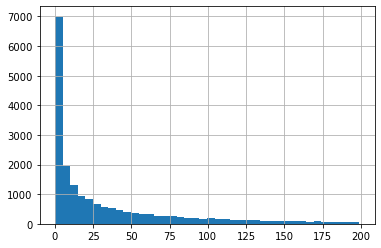

In [93]:
# Analyze the distribution of 'number_of_reviews' to decide the filter to
# apply to our dataset
df[df['number_of_reviews'] < 200]['number_of_reviews'].hist(bins=40)
plt.show()

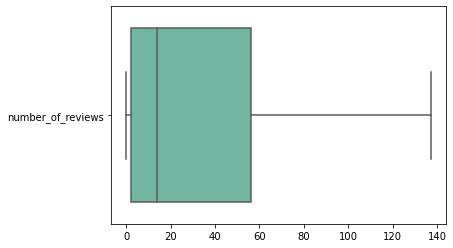

In [94]:
# Analyze the distribution of 'number_of_reviews'
sns.boxplot(data=df[['number_of_reviews']], orient="h", palette="Set2", showfliers = False)
plt.show()

In [95]:
# Create a subset only with entire home/apt with at least 5 reviews
# (also exludes rows with NaN in 'number_of_reviews')
# This is the subset of apartments that makes sense to use to understand
# what are the features that most influence review score
df_5_reviews_entire = df[(df['number_of_reviews'] >= 5) &
                         (df['room_type'] == 'Entire home/apt')]
df_5_reviews_entire.shape

(10918, 398)

In [96]:
# Columns with unique values (should not be considered in the model)
cols_unique_value = df_5_reviews_entire.columns[df_5_reviews_entire.nunique() <= 1]
print(cols_unique_value)

Index(['scrape_id', 'room_type', 'bathrooms', 'calendar_updated',
       'has_availability', 'flag_amenity_4 Ring Gas cooker gas stove',
       'flag_amenity_Lanai',
       'flag_amenity_Portuguese Convection Oven stainless steel oven',
       'flag_amenity_Terrace', 'flag_amenity_Wifi – 80 Mbps',
       'flag_amenity_Amazon Echo  sound system with Bluetooth and aux',
       'flag_amenity_Rituals conditioner', 'flag_amenity_Concierge',
       'flag_amenity_Bosch stainless steel induction stove',
       'flag_amenity_Sun loungers',
       'flag_amenity_Paid parking lot on premises – 13 spaces',
       'flag_amenity_Driveway parking', 'flag_amenity_Delphius shampoo',
       'flag_amenity_Marshall sound system with Bluetooth and aux',
       'flag_amenity_Smart TV', 'flag_amenity_Outdoor pool',
       'flag_amenity_JBL Bluetooth sound system',
       'flag_amenity_Portable air conditioning',
       'flag_amenity_Bed sheets and pillows',
       'flag_amenity_Washer –\xa0In unit', 'flag_ame

In [97]:
# Drop columns with unique values
df_5_reviews_entire = df_5_reviews_entire.drop(cols_unique_value, axis = 1)
df_5_reviews_entire.shape

(10918, 301)

In [98]:
# What is the data type of each column in this new dataset?
df_5_reviews_entire.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10918 entries, 0 to 19971
Data columns (total 301 columns):
 #   Column                                                       Dtype   
---  ------                                                       -----   
 0   id                                                           int64   
 1   listing_url                                                  object  
 2   last_scraped                                                 object  
 3   name                                                         object  
 4   description                                                  object  
 5   neighborhood_overview                                        object  
 6   picture_url                                                  object  
 7   host_id                                                      int64   
 8   host_url                                                     object  
 9   host_name                                                   

In [99]:
# What is the % of NaN in each column?
pd.set_option('display.max_rows', None)
df_5_reviews_entire.isnull().sum()/len(df_5_reviews_entire)

id                                                             0.000000
listing_url                                                    0.000000
last_scraped                                                   0.000000
name                                                           0.000000
description                                                    0.000000
neighborhood_overview                                          0.260670
picture_url                                                    0.000000
host_id                                                        0.000000
host_url                                                       0.000000
host_name                                                      0.000000
host_since                                                     0.000000
host_location                                                  0.001008
host_about                                                     0.339531
host_response_time                                             0

In [100]:
pd.set_option('display.max_rows', 10)

In [101]:
# Create a list with all flags for amenities that remain
filter_col_new = [col for col in df_5_reviews_entire
                  if col.startswith('flag_amenity_')]

In [102]:
len(filter_col_new)

222

In [103]:
# How many listings with each amenity?
num_listings_amenity = df_5_reviews_entire[filter_col_new].sum()
num_listings_amenity.sort_values(ascending=False)

flag_amenity_Wifi                                           10688
flag_amenity_Kitchen                                        10438
flag_amenity_Essentials                                     10308
flag_amenity_Hair dryer                                     10075
flag_amenity_TV                                              9965
                                                            ...  
flag_amenity_Wifi – 300 Mbps                                    1
flag_amenity_40" HDTV with premium cable                        1
flag_amenity_FRICON refrigerator                                1
flag_amenity_Free driveway parking on premises – 1 space        1
flag_amenity_Bosch oven                                         1
Length: 222, dtype: int64

In [104]:
# What is the percentage of listings with each amenity?
perc_listings_amenity = df_5_reviews_entire[filter_col_new].sum()/len(df)
perc_listings_amenity.sort_values(ascending=False)

flag_amenity_Wifi                                           0.528324
flag_amenity_Kitchen                                        0.515966
flag_amenity_Essentials                                     0.509540
flag_amenity_Hair dryer                                     0.498023
flag_amenity_TV                                             0.492585
                                                              ...   
flag_amenity_Wifi – 300 Mbps                                0.000049
flag_amenity_40" HDTV with premium cable                    0.000049
flag_amenity_FRICON refrigerator                            0.000049
flag_amenity_Free driveway parking on premises – 1 space    0.000049
flag_amenity_Bosch oven                                     0.000049
Length: 222, dtype: float64

In [105]:
# Analyze the distribution of 'review_scores_rating'
df_5_reviews_entire.describe().review_scores_rating

count    10918.000000
mean        93.939091
std          4.914181
min         50.000000
25%         92.000000
50%         95.000000
75%         97.000000
max        100.000000
Name: review_scores_rating, dtype: float64

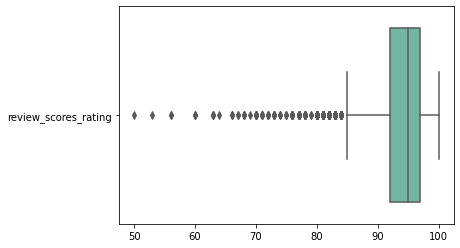

In [106]:
# Analyze the distribution of 'review_scores_rating'
sns.boxplot(data=df_5_reviews_entire[['review_scores_rating']],
            orient="h", palette="Set2")
plt.show()

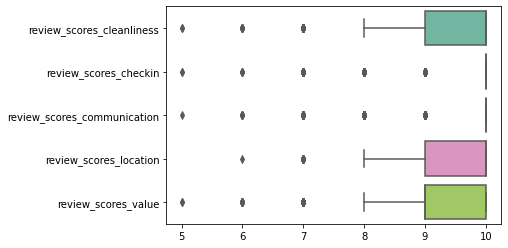

In [107]:
# Analyze the distribution of other 'review_scores_...'
sns.boxplot(data=df_5_reviews_entire[['review_scores_cleanliness',
                                      'review_scores_checkin',
                                      'review_scores_communication',
                                      'review_scores_location',
                                      'review_scores_value']],
            orient="h", palette="Set2")
plt.show()

In [108]:
# Analyze a feature potentially related to 'review_scores_rating':
# quantile_tot_amenities
df_5_reviews_entire.groupby([
    'quantile_tot_amenities']).agg({'tot_amenities': ['min', 'max'],
                                    'review_scores_rating': ['count', 'mean',
                                                             'std', 'median']}
                                   ).sort_values(by='quantile_tot_amenities')

tot_amenities     review_scores_rating             \
                                 min max                count       mean   
quantile_tot_amenities                                                     
Bronze                             0  14                 1091  91.678277   
Silver                            15  21                 2012  92.905070   
Gold                              22  27                 2462  93.601137   
Platinum                          28  32                 2469  94.113001   
Diamond                           33  68                 2884  95.655340   

                                         
                             std median  
quantile_tot_amenities                   
Bronze                  5.750475   92.0  
Silver                  5.624362   94.0  
Gold                    4.720137   94.0  
Platinum                4.591298   95.0  
Diamond                 3.750056   97.0

In [109]:
# Analyze a feature potentially related to 'review_scores_rating':
# quantile_price_per_person
df_5_reviews_entire.groupby([
    'quantile_price_per_person']).agg({'price_per_person': ['min', 'max'],
                                       'review_scores_rating': ['count', 'mean',
                                                                'std', 'median']}
                                      ).sort_values(by='quantile_price_per_person')

price_per_person              review_scores_rating  \
                                       min          max                count   
quantile_price_per_person                                                      
ppp_Q1                            1.500000    11.500000                 2467   
ppp_Q2                           11.538462    15.255000                 2453   
ppp_Q3                           15.312500    20.000000                 2550   
ppp_Q4                           20.066667    27.500000                 2003   
ppp_Q5                           27.600000  3460.666667                 1445   

                                                       
                                mean       std median  
quantile_price_per_person                              
ppp_Q1                     92.790028  5.096841   94.0  
ppp_Q2                     93.650224  4.735237   95.0  
ppp_Q3                     94.251373  4.766657   95.0  
ppp_Q4                     94.460809  4.893760   96.0  
ppp_Q5                     95.116955  4.742192   96.0

In [110]:
# Analyze a feature potentially related to 'review_scores_rating':
# quantile_host_listings_count
df_5_reviews_entire.groupby([
    'quantile_host_listings_count']).agg({'host_listings_count': ['min', 'max'],
                                       'review_scores_rating': ['count', 'mean',
                                                                'std', 'median']}
                                      ).sort_values(by='quantile_host_listings_count')

host_listings_count      review_scores_rating  \
                                             min  max                count   
quantile_host_listings_count                                                 
hlc_Q1                                         0    1                 3473   
hlc_Q2                                         2    2                 1429   
hlc_Q3                                         3    5                 2034   
hlc_Q4                                         6   14                 1777   
hlc_Q5                                        15  536                 2205   

                                                          
                                   mean       std median  
quantile_host_listings_count                              
hlc_Q1                        94.928016  4.194302   96.0  
hlc_Q2                        94.691393  4.477684   96.0  
hlc_Q3                        94.370698  4.477110   95.0  
hlc_Q4                        93.315701  4.922021   94.0  
hlc_Q5                        91.998186  5.894105   93.0

In [111]:
# Analyze a feature potentially related to 'review_scores_rating':
# flag_host_response_rate_100
pd.set_option('display.max_rows', None)
df_5_reviews_entire.groupby(['property_type']
                           ).agg(['count', 'mean']).review_scores_rating.sort_values(by='count', ascending=False).head(20)

,count,mean
property_type,,
Entire apartment,8949,93.735501
Entire house,759,94.830040
Entire condominium,281,94.960854
Entire loft,190,94.252632
Entire villa,160,95.718750
Entire serviced apartment,114,93.210526
Entire cottage,111,95.171171
Entire townhouse,84,95.130952
Camper/RV,52,97.076923


In [112]:
# Analyze a feature potentially related to 'review_scores_rating':
# flag_host_response_rate_100
pd.set_option('display.max_rows', 10)
df_5_reviews_entire.groupby(['flag_host_response_rate_100']
                           ).agg(['count', 'mean']).review_scores_rating

,count,mean
flag_host_response_rate_100,,
0.0,2131,91.924918
1.0,7049,94.531281


In [113]:
# Analyze a feature potentially related to 'review_scores_rating':
# host_response_time
df_5_reviews_entire.groupby(['host_response_time']
                           ).agg(['count', 'mean']).review_scores_rating

,count,mean
host_response_time,,
a few days or more,220,91.777273
within a day,719,93.963839
within a few hours,1581,94.110057
within an hour,6660,93.949550


In [114]:
# Analyze a feature potentially related to 'review_scores_rating':
# flag_amenity_Wifi
df_5_reviews_entire.groupby(['flag_amenity_Wifi']
                           ).agg(['count', 'mean']).review_scores_rating

,count,mean
flag_amenity_Wifi,,
False,230,92.791304
True,10688,93.963791


In [115]:
# Analyze a feature potentially related to 'review_scores_rating':
# flag_amenity_Air conditioning
df_5_reviews_entire.groupby(['flag_amenity_Air conditioning']
                           ).agg(['count', 'mean']).review_scores_rating

,count,mean
flag_amenity_Air conditioning,,
False,6827,93.320199
True,4091,94.971890


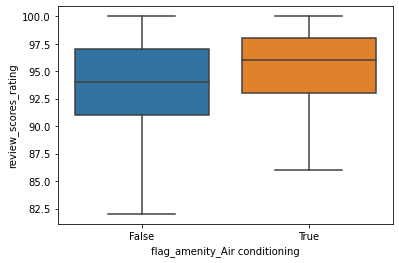

In [116]:
# Analyze the same two features using box plots
ax = sns.boxplot(x="flag_amenity_Air conditioning", y="review_scores_rating",
                 showfliers = False, data=df_5_reviews_entire)

In [117]:
# Analyze a feature potentially related to 'review_scores_rating':
# host_years_old
df_5_reviews_entire.groupby(['host_years_old']
                           ).agg(['count', 'mean']).review_scores_rating

,count,mean
host_years_old,,
0,78,94.205128
1,697,93.956958
2,1199,94.394495
3,1274,93.998430
4,1739,94.435883
...,...,...
7,1230,93.828455
8,1113,91.990117
9,418,93.846890


    - Create dummy variables for categorical features

In [118]:
def create_dummy_df(df, dummy_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the
               categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical
               columns or not

    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN
               values
            5. Use a prefix of the column name with an underscore (_) for
               separating
    '''
    other_df = df.drop(dummy_cols, axis=1)
    dummy_df = pd.get_dummies(df[dummy_cols], drop_first=True,
                              dummy_na=dummy_na)
    df = pd.concat([other_df, dummy_df], axis=1)

    return df

In [119]:
# Create dummy variables for each categorical feature that will be used in the
# model
dummy_cols_lst = ['host_response_time', 'neighbourhood_group_cleansed',
                  'neighbourhood_cleansed', 'property_type']

df_5_reviews_entire_new = create_dummy_df(df_5_reviews_entire, dummy_cols_lst,
                                          dummy_na=True)

print(df_5_reviews_entire.shape)
print(df_5_reviews_entire_new.shape)

(10918, 301)
(10918, 467)


In [120]:
# Create a list of all the dummy variables created in the previous step
filter_col2 = [col for col in df_5_reviews_entire_new
               if col.startswith('host_response_time') or
               col.startswith('property_type') or
               col.startswith('neighbourhood_group_cleansed') or
               col.startswith('neighbourhood_cleansed')]

In [121]:
filter_col2

['host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'host_response_time_nan',
 'neighbourhood_group_cleansed_Amadora',
 'neighbourhood_group_cleansed_Arruda Dos Vinhos',
 'neighbourhood_group_cleansed_Azambuja',
 'neighbourhood_group_cleansed_Cadaval',
 'neighbourhood_group_cleansed_Cascais',
 'neighbourhood_group_cleansed_Lisboa',
 'neighbourhood_group_cleansed_Loures',
 'neighbourhood_group_cleansed_Lourinh',
 'neighbourhood_group_cleansed_Mafra',
 'neighbourhood_group_cleansed_Odivelas',
 'neighbourhood_group_cleansed_Oeiras',
 'neighbourhood_group_cleansed_Sintra',
 'neighbourhood_group_cleansed_Sobral De Monte Agrao',
 'neighbourhood_group_cleansed_Torres Vedras',
 'neighbourhood_group_cleansed_Vila Franca De Xira',
 'neighbourhood_group_cleansed_nan',
 'neighbourhood_cleansed_Agualva e Mira-Sintra',
 'neighbourhood_cleansed_Ajuda',
 'neighbourhood_cleansed_Alcabideche',
 'neighbourhood_cleansed_Alcntara',
 'neighbou

    - Replace NaN values, first deciding what is the most appropriate value to replace the missing values

In [122]:
# The most frequent situation is to have a bedroom for every two people
df_5_reviews_entire_new['persons_per_bedroom'] = df_5_reviews_entire_new[
    'accommodates']/df_5_reviews_entire_new['bedrooms']
df_5_reviews_entire_new['persons_per_bedroom'].mode()

0    2.0
dtype: float64

In [123]:
# The most frequent situation is to have a bed for every two people
df_5_reviews_entire_new['persons_per_bed'] = df_5_reviews_entire_new[
    'accommodates']/df_5_reviews_entire_new['beds']
df_5_reviews_entire_new['persons_per_bed'].mode()

0    2.0
dtype: float64

In [124]:
df_5_reviews_entire_new['bedrooms'].value_counts(dropna=False)

1.0     4411
2.0     3622
3.0     1474
NaN      655
4.0      463
        ... 
9.0        6
10.0       2
12.0       2
18.0       1
24.0       1
Name: bedrooms, Length: 14, dtype: int64

In [125]:
# Replace NaN values in 'bedrooms' and 'beds' by the nearest integer value
# in 'accommodates'/2, because this is the most frequent situation
df_5_reviews_entire_new['bedrooms'] = df_5_reviews_entire_new[
    'bedrooms'].fillna(round(df_5_reviews_entire_new['accommodates']/2))
df_5_reviews_entire_new['beds'] = df_5_reviews_entire_new[
    'beds'].fillna(round(df_5_reviews_entire_new['accommodates']/2))

In [126]:
df_5_reviews_entire_new['bedrooms'].value_counts(dropna=False)

1.0     4818
2.0     3858
3.0     1481
4.0      465
5.0      175
        ... 
10.0       2
12.0       2
0.0        2
18.0       1
24.0       1
Name: bedrooms, Length: 14, dtype: int64

In [127]:
# NaN values in 'host_response_time' were treated with the creation of
# the dummy variables
df_5_reviews_entire['host_response_time'].value_counts(dropna=False)

within an hour        6660
NaN                   1738
within a few hours    1581
within a day           719
a few days or more     220
Name: host_response_time, dtype: int64

In [128]:
df_5_reviews_entire_new['host_response_time_nan'].value_counts(dropna=False)

0    9180
1    1738
Name: host_response_time_nan, dtype: int64

In [129]:
df_5_reviews_entire_new['host_response_rate'].value_counts(dropna=False)

100.0    7049
NaN      1738
90.0      330
97.0      260
80.0      180
         ... 
87.0        2
79.0        1
10.0        1
13.0        1
22.0        1
Name: host_response_rate, Length: 44, dtype: int64

In [130]:
df_5_reviews_entire_new['host_acceptance_rate'].value_counts(dropna=False)

100.0    6791
99.0      813
NaN       611
97.0      402
98.0      374
         ... 
27.0        1
24.0        1
18.0        1
22.0        1
52.0        1
Name: host_acceptance_rate, Length: 72, dtype: int64

In [131]:
# Replace NaN values in 'host_response_rate' and in 'host_acceptance_rate'
# by the median, because NaN values in these features mean that there was
# never a customer who needed to contact the host 
df_5_reviews_entire_new[
    'host_response_rate'].fillna(value=df_5_reviews_entire_new[
        'host_response_rate'].median(), inplace=True)
df_5_reviews_entire_new[
    'host_acceptance_rate'].fillna(value=df_5_reviews_entire_new[
        'host_acceptance_rate'].median(), inplace=True)

In [132]:
df_5_reviews_entire_new['host_response_rate'].value_counts(dropna=False)

100.0    8787
90.0      330
97.0      260
80.0      180
0.0       162
         ... 
87.0        2
79.0        1
13.0        1
10.0        1
22.0        1
Name: host_response_rate, Length: 43, dtype: int64

In [133]:
df_5_reviews_entire_new['host_acceptance_rate'].value_counts(dropna=False)

100.0    7402
99.0      813
97.0      402
98.0      374
96.0      233
         ... 
24.0        1
52.0        1
27.0        1
18.0        1
22.0        1
Name: host_acceptance_rate, Length: 71, dtype: int64

In [134]:
# What is the % of NaN in each column?
pd.set_option('display.max_rows', None)
df_5_reviews_entire_new.isnull().sum()/len(df_5_reviews_entire)

id                                                                          0.000000
listing_url                                                                 0.000000
last_scraped                                                                0.000000
name                                                                        0.000000
description                                                                 0.000000
neighborhood_overview                                                       0.260670
picture_url                                                                 0.000000
host_id                                                                     0.000000
host_url                                                                    0.000000
host_name                                                                   0.000000
host_since                                                                  0.000000
host_location                                                    

    - Remove all columns applicable to less than 0,5% of the universe

In [135]:
# Identify flags with less than 0.5% of the universe and mark them using the flag
# "more_than_0_5_of_the_universe" = False
df_flags = (df_5_reviews_entire_new[filter_col2 + filter_col_new].sum() >=
            (df_5_reviews_entire_new.shape[0]*0.005)).to_frame().reset_index()
df_flags.columns = ['feature', 'more_than_0_5_of_the_universe']

In [136]:
df_flags

,feature,more_than_0_5_of_the_universe
0,host_response_time_within a day,True
1,host_response_time_within a few hours,True
2,host_response_time_within an hour,True
3,host_response_time_nan,True
4,neighbourhood_group_cleansed_Amadora,False
5,neighbourhood_group_cleansed_Arruda Dos Vinhos,False
6,neighbourhood_group_cleansed_Azambuja,False
7,neighbourhood_group_cleansed_Cadaval,False
8,neighbourhood_group_cleansed_Cascais,True
9,neighbourhood_group_cleansed_Lisboa,True


In [137]:
# How many boolean features are applicable to less than 0,5% of the universe?
df_flags['more_than_0_5_of_the_universe'].value_counts(dropna=False)

False    258
True     134
Name: more_than_0_5_of_the_universe, dtype: int64

In [138]:
# To avoid overfitting, only considers the 134 characteristics that are
# applicable to at least 0.5% of the universe have
list_flags_to_consider = (df_flags[df_flags[
    'more_than_0_5_of_the_universe'] == True].feature).tolist()

In [139]:
list_flags_to_consider

['host_response_time_within a day',
 'host_response_time_within a few hours',
 'host_response_time_within an hour',
 'host_response_time_nan',
 'neighbourhood_group_cleansed_Cascais',
 'neighbourhood_group_cleansed_Lisboa',
 'neighbourhood_group_cleansed_Lourinh',
 'neighbourhood_group_cleansed_Mafra',
 'neighbourhood_group_cleansed_Oeiras',
 'neighbourhood_group_cleansed_Sintra',
 'neighbourhood_group_cleansed_Torres Vedras',
 'neighbourhood_cleansed_Ajuda',
 'neighbourhood_cleansed_Alcabideche',
 'neighbourhood_cleansed_Alcntara',
 'neighbourhood_cleansed_Alvalade',
 'neighbourhood_cleansed_Areeiro',
 'neighbourhood_cleansed_Arroios',
 'neighbourhood_cleansed_Avenidas Novas',
 'neighbourhood_cleansed_Belm',
 'neighbourhood_cleansed_Campo de Ourique',
 'neighbourhood_cleansed_Campolide',
 'neighbourhood_cleansed_Carcavelos e Parede',
 'neighbourhood_cleansed_Cascais e Estoril',
 'neighbourhood_cleansed_Colares',
 'neighbourhood_cleansed_Ericeira',
 'neighbourhood_cleansed_Estrela',
 '

In [140]:
len(list_flags_to_consider)

134

- Build a linear regression model to answer the question

    - Feature selection

In [141]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out=0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[
                included+[new_column]].astype(float)))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = excluded[new_pval.argmin()]
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(
                    best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[
            included].astype(float)))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(
                    worst_feature, worst_pval))
        if not changed:
            break
    return included

In [142]:
X_ss = df_5_reviews_entire_new[['host_response_rate', 'host_acceptance_rate',
                                'host_listings_count', 'accommodates',
                                'bedrooms', 'beds', 'price',
                                'number_of_reviews', 'minimum_nights',
                                'reviews_per_month', 'tot_amenities',
                                'host_years_old', 'first_review_years_old',
                                'price_per_person'] + list_flags_to_consider]
y_ss = df_5_reviews_entire_new['review_scores_rating']

In [143]:
result = stepwise_selection(X_ss, y_ss)

print('resulting features stepwise_selection y=review_scores_rating:')
print(result)

Add  tot_amenities                  with p-value 9.04122e-161
Add  host_listings_count            with p-value 8.02776e-117
Add  flag_amenity_Bedroom comforts  with p-value 1.00959e-70
Add  flag_amenity_Bathroom essentials with p-value 1.00959e-70
Add  flag_amenity_Air conditioning  with p-value 1.18492e-43
Add  reviews_per_month              with p-value 1.63778e-20
Add  neighbourhood_group_cleansed_Lisboa with p-value 3.55375e-33
Add  flag_amenity_Bed linens        with p-value 2.07435e-18
Add  flag_amenity_ linens           with p-value 2.07435e-18
Add  flag_amenity_Dishwasher        with p-value 6.53038e-15
Add  host_response_rate             with p-value 8.5376e-13
Add  flag_amenity_First aid kit     with p-value 2.13746e-11
Add  flag_amenity_Extra pillows and blankets with p-value 1.32905e-09
Add  flag_amenity_Lockbox           with p-value 1.18402e-08
Add  first_review_years_old         with p-value 2.4828e-09
Add  flag_amenity_Single level home with p-value 2.16881e-08
Add  acc

In [144]:
len(result)

46

In [145]:
# When analyzing the p-values of stepwise_selection I suspected that
# 'flag_amenity_Bed linens' always has the same values as
# 'flag_amenity_ linens'. I confirmed that with the next query,
#  so I will remove it
df_5_reviews_entire_new[df_5_reviews_entire_new[
    'flag_amenity_Bedroom comforts'] != df_5_reviews_entire_new[
    'flag_amenity_Bathroom essentials']]

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities2,flag_amenity_Sound system,flag_amenity_Window AC unit,flag_amenity_Coffee maker,flag_amenity_Paid parking off premises,flag_amenity_Pool toys,flag_amenity_Sound system with Bluetooth and aux,flag_amenity_Ethernet connection,flag_amenity_Paid parking lot on premises,flag_amenity_Toshiba sound system with aux,flag_amenity_Oven,flag_amenity_Fire extinguisher,"flag_amenity_55"" HDTV with standard cable",flag_amenity_Air conditioning,flag_amenity_Piano,flag_amenity_Baking sheet,flag_amenity_BBQ grill,flag_amenity_Aromas de Portugal shampoo,flag_amenity_Stove,flag_amenity_Free parking garage on premises – 1 space,flag_amenity_First aid kit,"flag_amenity_32"" HDTV with premium cable",flag_amenity_Keypad,flag_amenity_Outlet covers,flag_amenity_Indesit refrigerator,flag_amenity_Mini fridge,flag_amenity_Stainless steel gas stove,flag_amenity_Baby bath,flag_amenity_Pocket wifi,flag_amenity_High chair,flag_amenity_Stainless steel electric stove,flag_amenity_LG sound system with aux,flag_amenity_Patio or balcony,flag_amenity_unterschiedlich body soap,flag_amenity_Hot tub,flag_amenity_Garden,flag_amenity_Siemens stainless steel oven,flag_amenity_Laptop-friendly workspace,flag_amenity_Luggage dropoff allowed,flag_amenity_Wifi – 4 Mbps,flag_amenity_Free parking on premises – 2 spaces,"flag_amenity_32"" TV",flag_amenity_Long term stays allowed,flag_amenity_Feno de Portugal body soap,flag_amenity_Samsung refrigerator,"flag_amenity_40"" HDTV with standard cable",flag_amenity_Kunft electric stove,flag_amenity_Kunft refrigerator,flag_amenity_Wifi – 300 Mbps,flag_amenity_Window guards,flag_amenity_FRICON refrigerator,flag_amenity_Free driveway parking on premises – 1 space,flag_amenity_Wifi – 100 Mbps,"flag_amenity_36"" HDTV",flag_amenity_HDTV,"flag_amenity_48"" HDTV with premium cable",flag_amenity_Branca body soap,flag_amenity_Nespresso machine,flag_amenity_Radiant heating,flag_amenity_Stair gates,flag_amenity_Beko refrigerator,flag_amenity_TV with premium cable,flag_amenity_Shower gel,flag_amenity_Free parking on premises – 3 spaces,flag_amenity_Lux conditioner,flag_amenity_standard cable,flag_amenity_Free parking on premises,"flag_amenity_32"" HDTV with standard cable",flag_amenity_Lake access,flag_amenity_SCANDINAVIAN WHITE shampoo,flag_amenity_SMEG gas stove,flag_amenity_Trash compactor,flag_amenity_Bathroom essentials,flag_amenity_Crib,flag_amenity_Chromecast,flag_amenity_Electric stove,flag_amenity_Laundromat nearby,flag_amenity_Ariston stainless steel oven,flag_amenity_HDTV with Chromecast,flag_amenity_Ariston refrigerator,flag_amenity_Paid parking on premises – 1 space,flag_amenity_Conditioner,flag_amenity_Portable fans,flag_amenity_Wifi,flag_amenity_Samsung refrigerator,flag_amenity_Paid parking lot off premises,flag_amenity_Pour Over Coffee,"flag_amenity_43"" HDTV",flag_amenity_F

In [146]:
# When analyzing the p-values of stepwise_selection I suspected that
# 'flag_amenity_Bedroom comforts' always has the same values as
# ''flag_amenity_Bathroom essentials'. I confirmed that with the next query,
#  so I will remove it
df_5_reviews_entire_new[df_5_reviews_entire_new[
    'flag_amenity_Bed linens'] != df_5_reviews_entire_new[
    'flag_amenity_ linens']]

,id,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,amenities2,flag_amenity_Sound system,flag_amenity_Window AC unit,flag_amenity_Coffee maker,flag_amenity_Paid parking off premises,flag_amenity_Pool toys,flag_amenity_Sound system with Bluetooth and aux,flag_amenity_Ethernet connection,flag_amenity_Paid parking lot on premises,flag_amenity_Toshiba sound system with aux,flag_amenity_Oven,flag_amenity_Fire extinguisher,"flag_amenity_55"" HDTV with standard cable",flag_amenity_Air conditioning,flag_amenity_Piano,flag_amenity_Baking sheet,flag_amenity_BBQ grill,flag_amenity_Aromas de Portugal shampoo,flag_amenity_Stove,flag_amenity_Free parking garage on premises – 1 space,flag_amenity_First aid kit,"flag_amenity_32"" HDTV with premium cable",flag_amenity_Keypad,flag_amenity_Outlet covers,flag_amenity_Indesit refrigerator,flag_amenity_Mini fridge,flag_amenity_Stainless steel gas stove,flag_amenity_Baby bath,flag_amenity_Pocket wifi,flag_amenity_High chair,flag_amenity_Stainless steel electric stove,flag_amenity_LG sound system with aux,flag_amenity_Patio or balcony,flag_amenity_unterschiedlich body soap,flag_amenity_Hot tub,flag_amenity_Garden,flag_amenity_Siemens stainless steel oven,flag_amenity_Laptop-friendly workspace,flag_amenity_Luggage dropoff allowed,flag_amenity_Wifi – 4 Mbps,flag_amenity_Free parking on premises – 2 spaces,"flag_amenity_32"" TV",flag_amenity_Long term stays allowed,flag_amenity_Feno de Portugal body soap,flag_amenity_Samsung refrigerator,"flag_amenity_40"" HDTV with standard cable",flag_amenity_Kunft electric stove,flag_amenity_Kunft refrigerator,flag_amenity_Wifi – 300 Mbps,flag_amenity_Window guards,flag_amenity_FRICON refrigerator,flag_amenity_Free driveway parking on premises – 1 space,flag_amenity_Wifi – 100 Mbps,"flag_amenity_36"" HDTV",flag_amenity_HDTV,"flag_amenity_48"" HDTV with premium cable",flag_amenity_Branca body soap,flag_amenity_Nespresso machine,flag_amenity_Radiant heating,flag_amenity_Stair gates,flag_amenity_Beko refrigerator,flag_amenity_TV with premium cable,flag_amenity_Shower gel,flag_amenity_Free parking on premises – 3 spaces,flag_amenity_Lux conditioner,flag_amenity_standard cable,flag_amenity_Free parking on premises,"flag_amenity_32"" HDTV with standard cable",flag_amenity_Lake access,flag_amenity_SCANDINAVIAN WHITE shampoo,flag_amenity_SMEG gas stove,flag_amenity_Trash compactor,flag_amenity_Bathroom essentials,flag_amenity_Crib,flag_amenity_Chromecast,flag_amenity_Electric stove,flag_amenity_Laundromat nearby,flag_amenity_Ariston stainless steel oven,flag_amenity_HDTV with Chromecast,flag_amenity_Ariston refrigerator,flag_amenity_Paid parking on premises – 1 space,flag_amenity_Conditioner,flag_amenity_Portable fans,flag_amenity_Wifi,flag_amenity_Samsung refrigerator,flag_amenity_Paid parking lot off premises,flag_amenity_Pour Over Coffee,"flag_amenity_43"" HDTV",flag_amenity_F

In [147]:
# Remove both features
result.remove('flag_amenity_Bed linens')
result.remove('flag_amenity_Bedroom comforts')

In [148]:
len(result)

44

    - Linear regression model

In [149]:
X = df_5_reviews_entire_new[result]

y = df_5_reviews_entire_new['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.30, random_state=42)

# Five steps:

# 1.Instantiate
lm_model = LinearRegression(normalize=True)
# 2. Fit
lm_model.fit(X_train, y_train)
# 3. Predict
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)
# 4. Rsquared
r2_train = r2_score(y_train, y_train_preds)
r2_test = r2_score(y_test, y_test_preds)
# 5. RMSE
mse_train = mean_squared_error(y_train, y_train_preds)
rmse_train = math.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y_test_preds)
rmse_test = math.sqrt(mse_test)

# Print r2 to see result
print(r2_train)
print(r2_test)
print(rmse_train)
print(rmse_test)

0.23353122918492575
0.22093506204901758
4.280317636437876
4.387449267764453


In [150]:
def find_optimal_lm_mod(X, y, cutoffs, test_size=.30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy
    categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion
    of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split
    used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        # reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        # split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(
            reduce_X, y, test_size=test_size, random_state=random_state)

        # fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        # append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    # reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    # split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        reduce_X, y, test_size=test_size, random_state=random_state)

    # fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

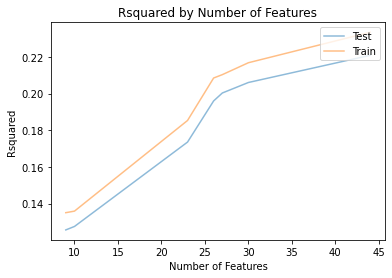

In [151]:
# Confirm that the model is not overfitted
cutoffs = [20000, 10000, 5000, 3500, 2500, 1000, 100, 50, 30, 25, 5]
find_optimal_lm_mod(X, y, cutoffs)
plt.show()

In [152]:
# Compares the quantiles of predicions with the real value
pd.set_option('display.max_rows', 10)
df_y_test = pd.DataFrame(y_test, columns=['review_scores_rating'])
df_y_test_preds = pd.DataFrame(y_test_preds, columns=[
    'review_scores_rating_preds'])
# Create quantiles of review_scores_rating, to use in analysis below
df_y_test_preds['quantile_review_scores_rating_preds'] = pd.qcut(
    df_y_test_preds['review_scores_rating_preds'], q=[
        0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
# Convert the qauntile feature to numeric
df_y_test_preds['quantile_review_scores_rating_preds'] = df_y_test_preds[
    'quantile_review_scores_rating_preds'].cat.codes
# Join the data frame with real target values in test set with the data frame
# with predicted target values in test set
df_y_test_test_preds = df_y_test_preds.set_index(
    df_y_test.index).join(df_y_test)

In [153]:
df_y_test_test_preds

,review_scores_rating_preds,quantile_review_scores_rating_preds,review_scores_rating
9546,93.475555,4,98.0
8245,97.346969,9,99.0
14717,95.255865,7,86.0
6132,90.117459,0,81.0
2910,95.495488,7,95.0
...,...,...,...
11561,96.371936,8,94.0
7991,97.991273,9,100.0
15132,94.511940,5,100.0
17049,92.217140,2,88.0


In [154]:
# Analyze the relation between real 'review_scores_rating' and quantiles of
# predicted 'review_scores_rating'
df_summary_y_test_test_preds = df_y_test_test_preds.groupby([
    'quantile_review_scores_rating_preds']).agg({
        'review_scores_rating_preds': ['min', 'max'],
        'review_scores_rating': ['count', 'mean', 'std', 'median']}
                     ).sort_values(by='quantile_review_scores_rating_preds')

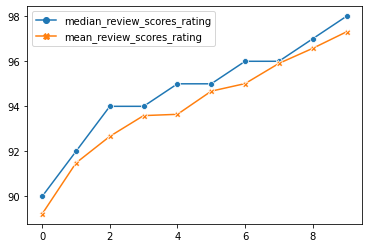

In [155]:
df_summary_y_test_test_preds.reset_index(inplace=True)
df_summary_y_test_test_preds.columns = ['quantile_review_scores_rating_preds',
                                        'min_review_scores_rating_preds',
                                        'max_review_scores_rating_preds',
                                        'qty', 'mean_review_scores_rating',
                                        'std_review_scores_rating',
                                        'median_review_scores_rating']
sns.lineplot(data=df_summary_y_test_test_preds[['median_review_scores_rating',
                                                'mean_review_scores_rating']],
             dashes=False, markers=True)
plt.show()

In [156]:
# Main conclusions: although the linear regression model has a low R2
# both in the training and in the test set, we can see that there is a
# very strong relationship between the decile of the predicted
# review_scores_rating and both the average and the median of the real
# review_scores_rating. So the model is able to capture the main factors
# that influence the review_scores_rating

### Question 5. How can I leverage my Airbnb review score?

In [157]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)

    Provides a dataframe that can be used to understand the most influential
    coefficients in a linear model by providing the coefficient estimates along
    with the name of the variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [158]:
# What are the intercept and the coefficients of our linear model?
print("Intercept: ", lm_model.intercept_)
coef_df = coef_weights(lm_model.coef_, X_train)
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_rows', None)
#A quick look at the top results
print("Coefficients: ", coef_df)

Intercept:  90.7540519252097
Coefficients:                                         est_int    coefs  abs_coefs
2             flag_amenity_Bathroom essentials  2.41105    2.41105
34     property_type_Entire serviced apartment -2.25480    2.25480
18                        flag_amenity_Freezer -1.96930    1.96930
36                   property_type_Entire loft -1.66287    1.66287
24  neighbourhood_group_cleansed_Torres Vedras  1.53501    1.53501
27              flag_amenity_Nespresso machine  1.53235    1.53235
32              property_type_Entire apartment -1.34821    1.34821
40            property_type_Entire condominium -1.31035    1.31035
23          neighbourhood_group_cleansed_Mafra  1.15982    1.15982
3                flag_amenity_Air conditioning  1.10606    1.10606
6                         flag_amenity_ linens -1.10596    1.10596
31     neighbourhood_cleansed_Campo de Ourique  1.09244    1.09244
5          neighbourhood_group_cleansed_Lisboa -1.03104    1.03104
21                

In [159]:
# What are the real and the potential review score ratings of my apartment?
df_y_test_test_preds[df_y_test_test_preds.index.isin([10562])]

,review_scores_rating_preds,quantile_review_scores_rating_preds,review_scores_rating
10562,91.43144,1,83.00000


In [160]:
# Conclusion: the real review score rating of my apartment is much lower than
# the potential review score rating, considering the location, the price, the
# number of persons it accomodates, the amenities it provides, etc.
# Probably the problems analyzed above, such as cleanliness, accuracy of the
# description or others, are contributing to lower the score

In [161]:
# Considering that, from the list of available features, the type and the
# quantity of amenities are the most easily adaptable characteristics, let's
# analyze which amenities can have more influence to increase the score

In [162]:
cmap = LinearSegmentedColormap.from_list(
    name='test',
    colors=['red', 'white', 'green'])
coef_df[coef_df['est_int'].str.contains("flag_amenity")][[
    'est_int', 'coefs']].sort_values(
        by='coefs').style.background_gradient(cmap=cmap)

,est_int,coefs
18,flag_amenity_Freezer,-1.969301
6,flag_amenity_ linens,-1.105957
13,flag_amenity_Single level home,-0.858019
11,flag_amenity_Lockbox,-0.816594
42,flag_amenity_Hot tub,-0.779812
35,flag_amenity_BBQ grill,-0.746412
22,flag_amenity_Stove,-0.661152
17,flag_amenity_Microwave,-0.643279
16,flag_amenity_Long term stays allowed,-0.588902
43,flag_amenity_Indoor fireplace,-0.552453


In [163]:
# Conclusion: We can see that certain amenities contribute to lower the score
# (marked in red), while others contribute to increase it (marked in green).
# I believe that many of these red amenities are not the cause for the low score,
# but rather they are a reflection of the type of apartment (correlation does
# not imply causation). For instance, it is not bad for an apartment to have a
# freezer or linens but, if the host refers it, our expectation about the apartment
# must be kept low.
# Nevertheless, as the value of the amenity flags is 0 or 1, this means that if a
# host equips an apartment, for example, with a Nespresso machine, the potential
# review score rating will go up 1.53 (on the 100-point scale). Even if this
# increase is not due exclusively to the presence of the coffee machine, but to the
# whole environment expected in an apartment with a Nespresso, this analysis
# provides good clues for hosts who want to see their apartment score increase: they
# should focus on ensuring the amenities that most influence the potential score.